## yt Help Slack Channel Text Analysis

In [1]:
#%matplotlib notebook

In [1]:
import spacy

In [6]:
import ktrain
import pandas as pd
import json
import glob
import matplotlib.pyplot as plt
import numpy as np
import re
from datetime import datetime
import dexplot as dxp

In [17]:
#borrowed

def remove_special_characters(text, remove_digits=False):
    pattern = r'[^a-zA-z0-9\s|]' if not remove_digits else r'[^a-zA-z\s|]'
    text = re.sub(pattern, '', text)
    text = text.replace('`', "")
    text = text.replace('```', "")
    return text

In [5]:
remove_special_characters(test)

NameError: name 're' is not defined

In [4]:
# in progress

def find_special_characters(text):
    pattern = re.findall(":$", text) 
    return pattern

In [5]:
s = "Sam :smile: is testing :frown_face:"

In [6]:
find_special_characters(s)

[':']

In [18]:
test = "Sam is trying code one: `testing1` and now trying ```testing2```"
print(remove_special_characters(test))

Sam is trying code one testing1 and now trying testing2


In [7]:
def topic_stop_words(word_list):
    clean_string = ""
    list_split = word_list.split()
    for w in list_split:
        if w not in stopwords:
            clean_string += w + " "
    return(clean_string)

In [8]:
def remove_stop_words(word_list):
    clean_list = []
    list_split = word_list.split()
    for w in list_split:
        if w not in stopwords:
            clean_list.append(w)
    return(clean_list)


In [9]:
def accummulate(two_lists):
    end_dict = {}
    for x in two_lists:
        if x not in end_dict:
            end_dict[x] = 1
        else:
            end_dict[x] = end_dict[x] + 1
    return(end_dict)

In [19]:
def get_code(words, start_symbol, end_symbol, pattern, anti_pattern='?'):
    code_block = ''
    if anti_pattern not in words:
        if pattern in words:
            code_block_start = words.find(start_symbol, 0, len(words))
            code_block_end = words.find(end_symbol, code_block_start+1, len(words))
            code_block = words[code_block_start+1:code_block_end]
            #words.replace(anit_pattern, "")
           # print(code_block)
    return code_block

In [11]:
otherfile = open("stopwords.txt", "rt")

stopwords = otherfile.read()

In [12]:
user_id = []
user_text =[]
just_words = []
user_id_dict = {}
ts_id_dict = {}

for file in glob.iglob('yt Slack export Mar 17 2015 - Jun 23 2020/help/*.json'):
    one_file = open(file, 'r')
    json_file = json.load(one_file)
    
    for j in json_file:
            
        for i in j.keys():
            try:
                if i == 'ts':
                    text = j['text'].lower()
                    if j['ts'] not in ts_id_dict:
                        ts_id_dict[j['ts']] = [j['type'], j['user'], text]
                    if j['files'] != None:
                        files = j['files']
                        for f in files:
                            file_shared = f['filetype']
                            #print(file_shared)
                    ts_id_dict[j['ts']].append(file_shared)
            except:
                pass

            if i == 'text':
                one_word = j['text'].split(' ')
                just_words += one_word
                user_text.append(j['text'])
                

In [13]:
df_ts_id = pd.DataFrame.from_dict(ts_id_dict, orient='index', columns = ["type", "user", "text", "files"])

In [14]:
df_ts_id

type       user  \
1574339930.160000  message  UD9L1D44T   
1574344978.161000  message  U042FH0RB   
1574383719.162300  message  U046K2QNK   
1574398975.162800  message  U042FH0RB   
1574398987.163300  message  U042FH0RB   
...                    ...        ...   
1590268313.285800  message  UD9L1D44T   
1590270970.289300  message  U5ET0RNKE   
1590271291.290700  message  U5ET0RNKE   
1590271397.290800  message  U31LWTKNW   
1565779103.115100  message  UME7T58A2   

                                                                text files  
1574339930.160000  hi ! i’m pretty sure it’s possible to define u...  None  
1574344978.161000  i don’t actually think there is a public api t...  None  
1574383719.162300  in `powderday` i'm trying to write code that w...  None  
1574398975.162800                that’ll break when yt-4.0 comes out  None  
1574398987.163300  maybe just check the first digit of the versio...  None  
...                                                              ...   ...  
1590268313.285800                                    anytime :smile:  None  
1590270970.289300  it looks like `ds.covering_grid` and `ds.smoot...  None  
1590271291.290700  is it possible to view the web documentation f...  None  
1590271397.290800  the docs from the main release versions are on...  None  
1565779103.115100                <@ume7t58a2> has joined the channel  None  

[6440 rows x 4 columns]

In [15]:
df_ts_id['timestamp'] = [str(datetime.fromtimestamp(float(x)))for x in df_ts_id.index]

In [16]:
df_ts_id[['date', 'time']] = df_ts_id['timestamp'].str.split(expand = True)

In [17]:
df_ts_id['word_count'] = [len(x) for x in df_ts_id['text']]

In [18]:
df_ts_id['clean_text'] = [remove_special_characters(x) for x in df_ts_id['text']]

In [19]:
df_ts_id['cleaner_text'] = [remove_stop_words(x) for x in df_ts_id['clean_text']]

In [20]:
df_ts_id['topic_text'] = [topic_stop_words(x) for x in df_ts_id['clean_text']]

In [21]:
df_ts_id['year'] = [x[:4] for x in df_ts_id['date']]

In [22]:
df_ts_id['year-month'] = [x[:7] for x in df_ts_id['date']]

In [23]:
df_ts_id['code_block'] = [get_code(x, '```', '```', '```') for x in df_ts_id['text']]

In [24]:
df_ts_id['code_block'] = df_ts_id['code_block'].replace('', np.nan, regex=True)

In [25]:
df_ts_id['links'] = [get_code(x, '<', '>', 'http', '@') for x in df_ts_id['text']]

In [26]:
df_ts_id['links'] = df_ts_id['links'].replace('', np.nan, regex=True)

In [27]:
df_ts_id['emojis'] = [get_code(x, ':', ':', ':', 'http') for x in df_ts_id['text']]

In [28]:
df_ts_id['emojis'] = df_ts_id['emojis'].replace('', np.nan, regex=True)

In [29]:
df_ts_id

type       user  \
1574339930.160000  message  UD9L1D44T   
1574344978.161000  message  U042FH0RB   
1574383719.162300  message  U046K2QNK   
1574398975.162800  message  U042FH0RB   
1574398987.163300  message  U042FH0RB   
...                    ...        ...   
1590268313.285800  message  UD9L1D44T   
1590270970.289300  message  U5ET0RNKE   
1590271291.290700  message  U5ET0RNKE   
1590271397.290800  message  U31LWTKNW   
1565779103.115100  message  UME7T58A2   

                                                                text files  \
1574339930.160000  hi ! i’m pretty sure it’s possible to define u...  None   
1574344978.161000  i don’t actually think there is a public api t...  None   
1574383719.162300  in `powderday` i'm trying to write code that w...  None   
1574398975.162800                that’ll break when yt-4.0 comes out  None   
1574398987.163300  maybe just check the first digit of the versio...  None   
...                                                              ...   ...   
1590268313.285800                                    anytime :smile:  None   
1590270970.289300  it looks like `ds.covering_grid` and `ds.smoot...  None   
1590271291.290700  is it possible to view the web documentation f...  None   
1590271397.290800  the docs from the main release versions are on...  None   
1565779103.115100                <@ume7t58a2> has joined the channel  None   

                                    timestamp        date             time  \
1574339930.160000  2019-11-21 06:38:50.160000  2019-11-21  06:38:50.160000   
1574344978.161000  2019-11-21 08:02:58.161000  2019-11-21  08:02:58.161000   
1574383719.162300  2019-11-21 18:48:39.162300  2019-11-21  18:48:39.162300   
1574398975.162800  2019-11-21 23:02:55.162800  2019-11-21  23:02:55.162800   
1574398987.163300  2019-11-21 23:03:07.163300  2019-11-21  23:03:07.163300   
...                                       ...         ...              ...   
1590268313.285800  2020-05-23 16:11:53.285800  2020-05-23  16:11:53.285800   
1590270970.289300  2020-05-23 16:56:10.289300  2020-05-23  16:56:10.289300   
1590271291.290700  2020-05-23 17:01:31.290700  2020-05-23  17:01:31.290700   
1590271397.290800  2020-05-23 17:03:17.290800  2020-05-23  17:03:17.290800   
1565779103.115100  2019-08-14 05:38:23.115100  2019-08-14  05:38:23.115100   

                   word_count  \
1574339930.160000         151   
1574344978.161000         115   
1574383719.162300         294   
1574398975.162800          35   
1574398987.163300          55   
...                       ...   
1590268313.285800          15   
1590270970.289300         579   
1590271291.290700         104   
1590271397.290800         164   
1565779103.115100          35   

                                                          clean_text  \
1574339930.160000  hi  im pretty sure its possible to define unit...   
1574344978.161000  i dont actually think there is a public api to...   
1574383719.162300  in powderday im trying to write code that will...   
1574398975.162800                   thatll break when yt40 comes out   
1574398987.163300  maybe just check the first digit of the versio...   
...                                                              ...   
1590268313.285800                                      anytime smile   
1590270970.289300  it looks like dscovering_grid and dssmoothed_c...   
1590271291.290700  is it possible to view the web documentation f...   
1590271397.290800  the docs from the main release versions are on...   
1565779103.115100                   ume7t58a2 has joined the channel   

                                                        cleaner_text  \
1574339930.160000  [pretty, possible, define, units, equivalences...   
1574344978.161000  [actually, think, public, api, poke, around, c...   
1574383719.162300  [powderday, trying, write, code, automagically...   
1574398975.162800                       [thatll, break, yt40, comes]   
1574398987.163300      [maybe, ch

In [30]:
ktrain.text.preprocessor.detect_lang = ktrain.text.textutils.detect_lang
df = df_ts_id
texts = df['topic_text']
tm = ktrain.text.get_topic_model(texts, n_topics=None, n_features=10000)

n_topics automatically set to 56
lang: en
preprocessing texts...
fitting model...
iteration: 1 of max_iter: 5
iteration: 2 of max_iter: 5
iteration: 3 of max_iter: 5
iteration: 4 of max_iter: 5
iteration: 5 of max_iter: 5
done.


In [31]:
tm.print_topics()
tm.build(texts, threshold=0.25)

topic 0 | thing later added arent release created bet bad dsderived_field_list today
topic 1 | u042hlt7u making results ideas second related sec attached differences agree
topic 2 | case add slice correct axes arbitrary vector projections upload save
topic 3 | code version check stuff better write debug old explain gizmo
topic 4 | h_p0_number_density string stellar_mass saying dspoint maybe check version pressure replace
topic 5 | time issues octree node given resolution gives uid happy faster
topic 6 | set working looking center return bit files index simulation u91855pa9
topic 7 | great exactly python cool pull start module installation request okay
topic 8 | principle wants mpi4py hpc moving uh593l8tu sunrise guess derived rotation
topic 9 | data thanks using help example halo object figure able particle
topic 10 | lol widget wrong channel joined try using ytdev particle possible
topic 11 | quantities confused sunrise regionds caches idv fits field idea cell
topic 12 | field values 

In [32]:
texts = tm.filter(texts)
df = tm.filter(df)

In [33]:
tm.visualize_documents(doc_topics=tm.get_doctopics())

reducing to 2 dimensions...[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 1610 samples in 0.004s...
[t-SNE] Computed neighbors for 1610 samples in 0.283s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1610
[t-SNE] Computed conditional probabilities for sample 1610 / 1610
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 58.389263
[t-SNE] KL divergence after 1000 iterations: 0.536316
done.


Loading BokehJS ...

In [34]:
git_results = tm.search('git', case_sensitive=False)
mesh_results = tm.search('mesh', case_sensitive=False)
amr_results = tm.search('amr', case_sensitive=False)

In [35]:
threshold = .80
git_topic_ids = {doc[3] for doc in git_results if doc[2]>threshold}
mesh_topic_ids = {doc[3] for doc in mesh_results if doc[2]>threshold}
amr_topic_ids = {doc[3] for doc in amr_results if doc[2]>threshold}


In [36]:
t_topics = git_topic_ids.copy()
t_topics.update(mesh_topic_ids)
t_topics.update(amr_topic_ids)

In [37]:
tm.visualize_documents(doc_topics=tm.get_doctopics(t_topics))

reducing to 2 dimensions...[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 1610 samples in 0.004s...
[t-SNE] Computed neighbors for 1610 samples in 0.325s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1610
[t-SNE] Computed conditional probabilities for sample 1610 / 1610
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 58.389259
[t-SNE] KL divergence after 1000 iterations: 0.536316
done.


Loading BokehJS ...

In [38]:
emojis_in_df = df_ts_id[df_ts_id['emojis'].notnull()]
emojis_in_df['emojis']

1574383719.162300                                          \n   blah``
1535486614.000100                                               (units
1535486793.000100                                slightly_smiling_face
1568659517.000300      how do i get the star formation rate _now_? ...
1587507940.133300     could not find field '('all', 'hii_density')'...
                                           ...                        
1470343074.000003                                  getting help with y
1579616136.034900    \n```import yt\nimport numpy as np\n\nds = yt....
1582845692.078400     &lt;ufunc '? (vectorized)'&gt;` and `unit_ope...
1590268313.285800                                                smile
1590270970.289300    )\n\n`ds = yt.load(filename)`\n`level = 4`\n`d...
Name: emojis, Length: 596, dtype: object

In [39]:
links_in_df = df_ts_id[df_ts_id['links'].notnull()]
links_in_df['links']

1574399098.164000    https://github.com/yt-project/yt/blob/master/s...
1535486275.000200    https://gist.github.com/cphyc/ea1f8217cfd7b04f...
1535487825.000100    https://github.com/yt-project/yt/blob/70403c8b...
1529516560.000400    https://github.com/yt-project/yt/blob/master/y...
1529517861.000514                        https://pastebin.com/tmffef1g
                                           ...                        
1553538469.138100    http://yt-project.org/doc/analyzing/analysis_m...
1553538859.140400      http://hea-www.cfa.harvard.edu/~jzuhone/pyxsim/
1574108890.157600           https://github.com/yt-project/yt/pull/2358
1582850287.080200       http://yt-project.org/data|yt-project.org/data
1590271397.290800                     https://yt-project.org/docs/3.1/
Name: links, Length: 354, dtype: object

In [40]:
code_in_df = df_ts_id[df_ts_id['code_block'].notnull()]
code_in_df['code_block']

1535486614.000100    ``\n&gt; sp['gas_tracer', 'cell_density']\n\nd...
1529519395.000412    ``\ndiff --git a/yt/fields/field_detector.py b...
1553624983.150900    ``\nad.set_field_parameter('rotation_vectors',...
1534107369.000030    ``file "../../../pelecode/pele_make_movie_stri...
1563994530.015300    ``\nds = yt.load('out.e')\nprint(ds.field_list)\n
                                           ...                        
1587602067.138500    ``import yt\nh_planck = yt.units.physical_cons...
1591693075.329100    ``keyerror: "expected a sph particle type, got...
1591699421.331100    ``# reload dm particles into a stream dataset\...
1579616136.034900    ``import yt\nimport numpy as np\n\nds = yt.loa...
1571869601.050100    ``\nds.coordinates.x_axis[1] = 0\nds.coordinat...
Name: code_block, Length: 213, dtype: object

In [41]:
files_in_df = df_ts_id[df_ts_id['files'].notnull()]
files_in_df['files']

1535486275.000100    python
1535487390.000100    binary
1553637365.185500       png
1553637396.185900       png
1534107187.000045    python
                      ...  
1547517036.155900      text
1576170147.300800    binary
1583507899.152200       png
1587607948.140000       png
1587607982.140900    python
Name: files, Length: 138, dtype: object

In [42]:
df_ts_id.describe()

word_count
count  6440.000000
mean    114.584938
std     236.395018
min       0.000000
25%      35.000000
50%      64.000000
75%     116.000000
max    5412.000000

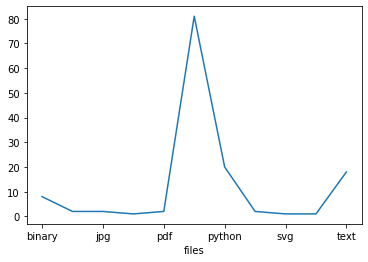

In [43]:
df_ts_id.groupby('files')['text'].count().plot()

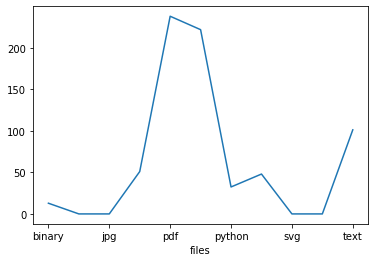

In [44]:
df_ts_id.groupby('files')['word_count'].mean().plot()

Text(0, 0.5, 'Count of Messages')

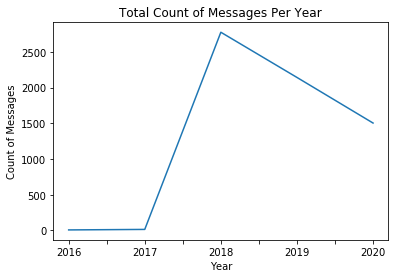

In [45]:
messages_per_date_ts = df_ts_id.groupby('year')['text'].count().plot()
plt.title("Total Count of Messages Per Year")
plt.xlabel("Year")
plt.ylabel("Count of Messages")

Text(0, 0.5, 'Count of Messages')

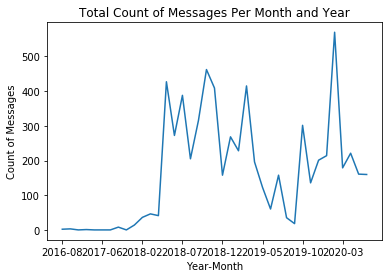

In [46]:
messages_per_date_ts = df_ts_id.groupby('year-month')['text'].count().plot()
plt.title("Total Count of Messages Per Month and Year")
plt.xlabel("Year-Month")
plt.ylabel("Count of Messages")

Text(0, 0.5, 'Average Number of Words per Message')

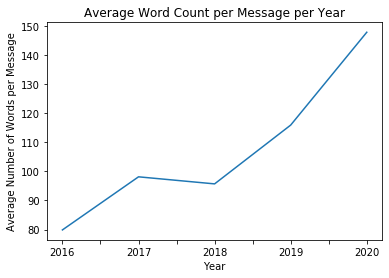

In [47]:
messages_per_date_ts = df_ts_id.groupby('year')['word_count'].mean().plot()
plt.title("Average Word Count per Message per Year")
plt.xlabel("Year")
plt.ylabel("Average Number of Words per Message")

Text(0, 0.5, 'Average Word Count')

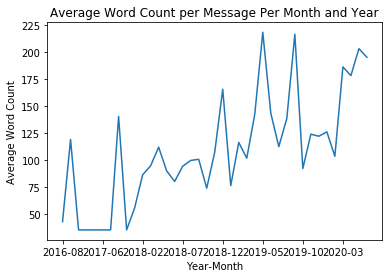

In [48]:
messages_per_date_ts = df_ts_id.groupby('year-month')['word_count'].mean().plot()
plt.title("Average Word Count per Message Per Month and Year")
plt.xlabel("Year-Month")
plt.ylabel("Average Word Count")

Text(0.5, 1.0, 'Distribution of Word Count per Message')

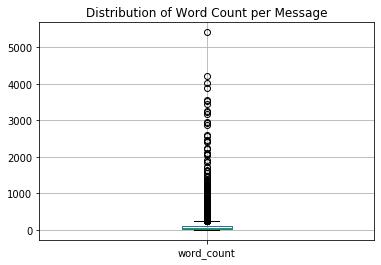

In [49]:
df_ts_id.boxplot(column='word_count')
plt.title("Distribution of Word Count per Message")

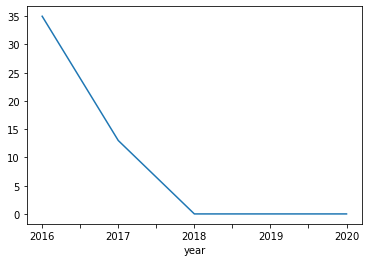

In [50]:
df_ts_id.groupby('year')['word_count'].min().plot()

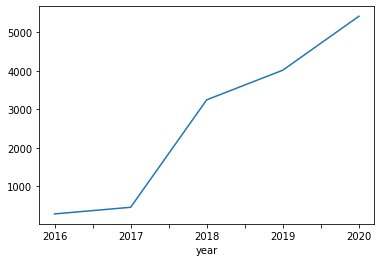

In [51]:
df_ts_id.groupby('year')['word_count'].max().plot()

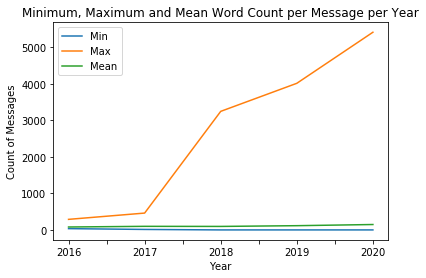

In [52]:
df_ts_id.groupby('year')['word_count'].min().plot()
df_ts_id.groupby('year')['word_count'].max().plot()
df_ts_id.groupby('year')['word_count'].mean().plot()
plt.title("Minimum, Maximum and Mean Word Count per Message per Year")
plt.xlabel("Year")
plt.ylabel("Count of Messages")
plt.legend(['Min', 'Max', 'Mean'])

In [53]:
df_ts_id.groupby(['code_block', 'links', 'files'])['word_count'].plot()

Series([], Name: word_count, dtype: float64)

Text(0, 0.5, 'Count of Messages')

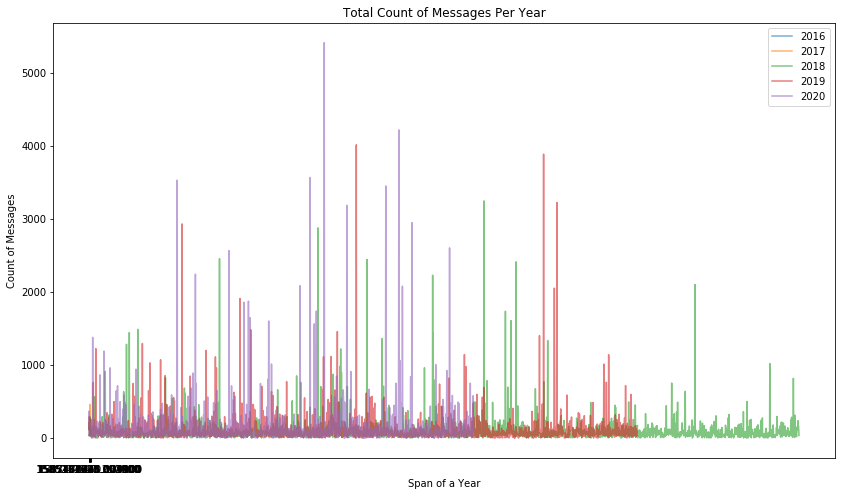

In [54]:
plt.figure(figsize=(14, 8))
df_ts_id.groupby('year')['word_count'].plot(alpha=0.6)
plt.legend()
plt.title("Total Count of Messages Per Year")
plt.xlabel("Span of a Year")
plt.ylabel("Count of Messages")


In [55]:
print(len(df_ts_id[df_ts_id['code_block'].notnull()]), "code blocks, which is % of code blocks", (len(df_ts_id[df_ts_id['code_block'].notnull()])/len(df_ts_id)*100))
print()
print(len(df_ts_id[df_ts_id['links'].notnull()]), "links, which is % of links", (len(df_ts_id[df_ts_id['links'].notnull()])/len(df_ts_id)*100))
print()
print(len(df_ts_id[df_ts_id['files'].notnull()]),  "files, which is % of files", (len(df_ts_id[df_ts_id['files'].notnull()])/len(df_ts_id)*100))

213 code blocks, which is % of code blocks 3.3074534161490683

354 links, which is % of links 5.496894409937888

138 files, which is % of files 2.142857142857143


In [56]:
just_words_sort = {}

for x in df_ts_id['cleaner_text']:
    #print(x)
    for y in x:
       # print(y)
        if y not in just_words_sort:
            just_words_sort[y] = 1
        else:
            just_words_sort[y] = just_words_sort[y] + 1
    

In [57]:
sorted_word_list = list(just_words_sort.items())

In [58]:
def by_value(pair):
    return pair[1]

sorted_word_list.sort(key = by_value, reverse= True)

count = 0

d_sorted = {}

for pair in sorted_word_list:
    count += 1
    if count <= 25:
        d_sorted[pair[0]] = pair[1]
    
print(d_sorted.items())

dict_items([('yt', 850), ('data', 534), ('field', 464), ('think', 403), ('thanks', 332), ('using', 301), ('one', 293), ('make', 268), ('file', 264), ('channel', 257), ('issue', 250), ('see', 249), ('code', 239), ('know', 238), ('joined', 233), ('work', 229), ('something', 217), ('fields', 217), ('try', 216), ('dataset', 213), ('import', 206), ('plot', 205), ('particle', 181), ('line', 180), ('density', 175)])


Text(0.5, 1.0, 'Top words in yt Help Slack Channel')

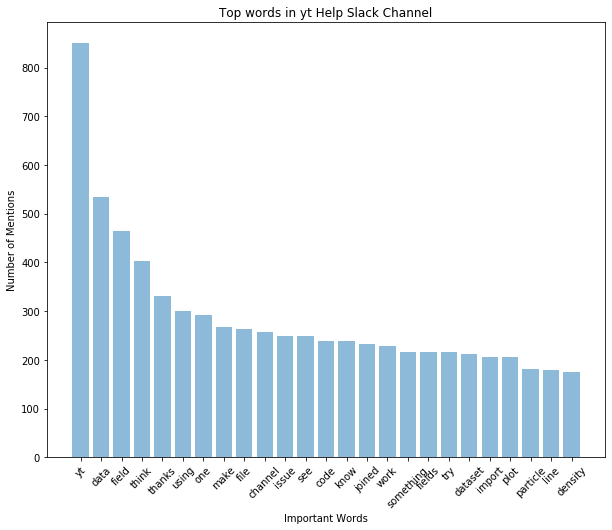

In [59]:
plt.figure(figsize=(10, 8))
plt.bar(d_sorted.keys(), d_sorted.values(), align='center', alpha=0.5)
plt.xticks(rotation=45)
plt.xlabel('Important Words')
plt.ylabel('Number of Mentions')
plt.title("Top words in yt Help Slack Channel")


In [60]:
date_and_words = df_ts_id[['date', 'cleaner_text']]

In [61]:
date_and_words.set_index('date')

cleaner_text
date                                                         
2019-11-21  [pretty, possible, define, units, equivalences...
2019-11-21  [actually, think, public, api, poke, around, c...
2019-11-21  [powderday, trying, write, code, automagically...
2019-11-21                       [thatll, break, yt40, comes]
2019-11-21      [maybe, check, first, digit, version, string]
...                                                       ...
2020-05-23                                   [anytime, smile]
2020-05-23  [looks, dscovering_grid, dssmoothed_covering_g...
2020-05-23  [possible, view, web, documentation, older, ve...
2020-05-23  [docs, main, release, versions, site, httpsytp...
2019-08-14                       [ume7t58a2, joined, channel]

[6440 rows x 1 columns]

In [62]:
def cleaning(two_lists, new_dict):
    for x in two_lists:
        if x not in new_dict:
            new_dict[x] = 1
        else:
            new_dict[x] = new_dict[x]+1
                
    return new_dict
      

In [63]:

def cat_count_words(user_cat):
    cat_list = []
    if user_cat in categories.keys():
        cat_filter = categories[user_cat]
        for i,v in just_words_sort.items():
            if i in cat_filter:
                cat_list.append([i,v])
    return cat_list

In [64]:
categories = {'versioning' : ['git', 'conda', 'version', 'issue', 'condaforge', 
              'pip', 'fork', 'repository', 'master', 'branch',
              'homebrew', 'path', 'github', 'repo', 'request', 
             'pull', 'push', 'clone'],
              
              'frontends' : ['ahf', 'amrvac', 'art', 'artio', 'athena', 'athena_pop', 
             'boxlib', 'chombo', 'eagle', 'enzo', 'enzo_p', 'exodus_ii', 
             'fits', 'flash', 'gadget', 'gadget_fof', 'gamer', 'gdf', 
             'gizmo', 'halo_catalog', 'http_stream', 'moab', 'open_pmd', 
             'owls', 'owls_subfind', 'ramses',
             'rockstar', 'sdf', 'sph', 'stream', 'tipsy', 'ytdata', 'frontend',
            'frontends'],
              
            'visualization' : ['sliceplot', 'slice', 'plot', 
            'projection', 'projectionplot', 'phase', 'profile', 
                'phaseplot','2d', '3d', 'color', 'colormap', 
            'plotting', 'image', 'images', 'resolution',
            'line', 'lineplot', 'axis', 'streamlines', 'png'],
             'loading_data' : ['load', 'data', 'file', 'zip', 'hdf5', 'json', 
                'notebook', 'dataset', 'files', 'txt', 'folder', 
                'directory', 'loading', 'loads', 'unzip', 'tar'
               ],
              
             'installation' : ['install', 'release', 'installing', 'installed',
               'update', 'enivronment', 'dependency', 'dependencies',
               'requirements', 'machine', 'windows', 'mac'],
              
             'volume_rendering' : ['volume', 'render', 'volumerender', 'volumerendering', 'rendering', 'rotate', 'camera', 'lens', 
                   'blend', 'blender', 'scene', 'zbuffer', 'off', 'axis'
                   'offaxis', 'shader', 'transfer function'],
              
              'volume_rendering': ['volume', 'render', 'volumerender', 'volumerendering', 'rendering', 'rotate', 'camera', 'lens', 
                   'blend', 'blender', 'scene', 'zbuffer', 'off', 'axis'
                   'offaxis', 'shader', 'transfer function'],
             
              'analysis' : ['analysis', 'average', 'mean', 'sum', 'median', 'max', 'maximum', 'min', 'clump','minimum', 
            'absorption spectrum', 'cosmological observation', 'halo', 'halos', 'halofinder',
           'halo mass function', 'level sets', 'particle trajectories', 'photon simulator', 'ppv cube',
           'radmc 3d export', 'spectral integrator', 'star analysis', 'sunrise export', 'sunyaev_zeldovich', 'two point functions'],
              
            'units' : ['unit', 'units', 'unyt', 'cm', 'mm', 'cgs', 'km', 
         'dimensions', 'equivalencies', 'symbols','symbol',
         'conversions'],
              
          'data_structures' : ['array', 'container', 'object', 
                   'time series', 'unions', 'mesh', 'grid', 
                   'unstructured', 'grid patch', 'uniform', 'structured',
                  'region', 'cell', 'cells', 'sphere', 'cylinder', 
                   'disk', 'objects', 'containers', 'octree', 'ytarray', 
                   'ytcontainer', 'string', 'list', 'dictionary', 'tuple'],
              
           'community' : ['channel', 'worksop', 'tutorial', 'meeting', 'resources',
            'website', 'twitter', 'opensource', 'docs', 'documentation',
             'presenation', 'paper', 'poster', 'joined', 'conduct'],
            
            'coordinates' : ['spherical', 'cartesian', 'azimuthal', 'coordinates'],
              
            
            'other_libraries' : ['numpy', 'matplotlib', 'cartopy']
    
              
              
             }

In [65]:
category_count = {}

In [66]:
version_total = 0
for i,v in just_words_sort.items():
    if i in categories['versioning']:
        print(i, v)
        version_total += v
print(version_total)

category_count['versioning'] = version_total 

version 144
issue 250
pull 47
request 23
repo 18
git 56
clone 16
github 46
fork 14
branch 42
condaforge 89
conda 52
path 26
pip 79
push 4
repository 6
master 31
homebrew 1
944


In [67]:
frontends_total = 0
for i, v in just_words_sort.items():
    if i in categories['frontends']:
        print(i, v)
        frontends_total +=v
print(frontends_total)
category_count['frontends'] = frontends_total 

frontend 44
rockstar 31
ramses 50
athena 7
fits 5
sph 78
gizmo 32
boxlib 7
enzo 26
gadget 26
artio 1
tipsy 3
amrvac 9
art 2
ahf 17
frontends 8
ytdata 4
stream 17
eagle 11
flash 5
halo_catalog 1
384


In [68]:
viz_total = 0
for i, v in just_words_sort.items():
    if i in categories['visualization']:
        print(i, v)
        viz_total += v
print(viz_total)
category_count['viz'] = viz_total 

plot 205
profile 76
line 180
2d 38
3d 62
image 101
png 9
colormap 16
phase 18
axis 56
plotting 30
slice 59
color 26
phaseplot 13
resolution 55
projection 80
projectionplot 21
sliceplot 24
streamlines 30
images 16
lineplot 1
1116


In [69]:
loading_data_total = 0
for i,v in just_words_sort.items():
    if i in categories['loading_data']:
        print(i, v)
        loading_data_total += v
print(loading_data_total)
category_count['loading_data'] = loading_data_total 

data 534
dataset 213
directory 19
file 264
files 64
loading 30
load 78
notebook 28
folder 10
hdf5 11
tar 4
loads 2
1257


In [70]:
installation_total = 0
for i,v in just_words_sort.items():
    if i in categories['installation']:
        print(i, v)
        installation_total += v
print(installation_total)

category_count['installation'] = installation_total

installing 57
install 136
dependency 3
mac 11
installed 44
machine 17
release 22
dependencies 5
update 40
windows 6
requirements 3
344


In [71]:
volume_total = 0
for i,v in just_words_sort.items():
    if i in categories['volume_rendering']:
        print(i, v)
        volume_total += v
print(volume_total)

category_count['volume_rendering'] = volume_total 

volume 61
rendering 47
rotate 9
off 45
render 8
volumerender 1
scene 5
camera 3
lens 6
blender 1
186


In [72]:
analysis_total = 0
for i,v in just_words_sort.items():
    if i in categories['analysis']:
        print(i, v)
        analysis_total += v
print(analysis_total)

category_count['analysis'] = analysis_total 

halo 104
max 24
mean 81
halos 40
analysis 22
minimum 4
maximum 9
average 20
min 15
sum 13
clump 7
339


In [73]:
units_total = 0
for i,v in just_words_sort.items():
    if i in categories['units']:
        print(i, v)
        units_total += v
print(units_total)

category_count['units'] = units_total 

units 123
unit 48
cm 25
cgs 9
dimensions 5
unyt 16
symbol 3
conversions 1
symbols 2
232


In [74]:
data_structures_total = 0
for i,v in just_words_sort.items():
    if i in categories['data_structures']:
        print(i, v)
        data_structures_total += v
print(data_structures_total)

category_count['data_structures'] = data_structures_total

string 11
cell 49
grid 113
cells 39
array 70
container 7
objects 33
object 131
sphere 64
unstructured 9
mesh 47
tuple 13
dictionary 16
ytarray 15
list 53
region 58
disk 30
structured 4
octree 38
uniform 14
containers 3
unions 2
cylinder 1
820


In [75]:
community_total = 0
for i,v in just_words_sort.items():
    if i in categories['community']:
        print(i, v)
        community_total += v
print(community_total)

category_count['community'] = community_total

joined 233
channel 257
documentation 28
paper 21
docs 40
tutorial 12
website 9
poster 1
meeting 3
resources 4
608


In [76]:
coordinates_total = 0
for i,v in just_words_sort.items():
    if i in categories['coordinates']:
        print(i, v)
        coordinates_total += v
print(coordinates_total)

category_count['coordinates'] = coordinates_total

cartesian 19
coordinates 45
spherical 11
azimuthal 2
77


In [77]:
other_libraries_total = 0
for i,v in just_words_sort.items():
    if i in categories['other_libraries']:
        print(i, v)
        other_libraries_total += v
print(other_libraries_total)

category_count['other_libraries'] = other_libraries_total

matplotlib 63
numpy 54
cartopy 5
122


In [78]:
sorted_category_list = list(category_count.items())

sorted_category_list.sort(key = by_value, reverse= True)

category_sorted = {}

for pair in sorted_category_list:
    category_sorted[pair[0]] = pair[1]
    
print(category_sorted.items())

dict_items([('loading_data', 1257), ('viz', 1116), ('versioning', 944), ('data_structures', 820), ('community', 608), ('frontends', 384), ('installation', 344), ('analysis', 339), ('units', 232), ('volume_rendering', 186), ('other_libraries', 122), ('coordinates', 77)])


In [79]:
def pick_simple():
    # simple picking, lines, rectangles and text
    fig, (ax1, ax2) = plt.subplots(2, 1)
    ax1.set_title('click on points, rectangles or text', picker=True)
    ax1.set_ylabel('ylabel', picker=True, bbox=dict(facecolor='red'))
    line, = ax1.plot(category_sorted.keys(), category_sorted.values())  # 5 points tolerance

    # pick the rectangle
    bars = ax2.bar(range(10), rand(10), picker=True)
    for label in ax2.get_xticklabels():  # make the xtick labels pickable
        label.set_picker(True)

    def onpick1(event):
        if isinstance(event.artist, Line2D):
            thisline = event.artist
            xdata = thisline.get_xdata()
            ydata = thisline.get_ydata()
            ind = event.ind
            print('onpick1 line:', np.column_stack([xdata[ind], ydata[ind]]))
        elif isinstance(event.artist, Rectangle):
            patch = event.artist
            print('onpick1 patch:', patch.get_path())

    fig.canvas.mpl_connect('pick_event', onpick1)

Text(0.5, 0, 'Categories')

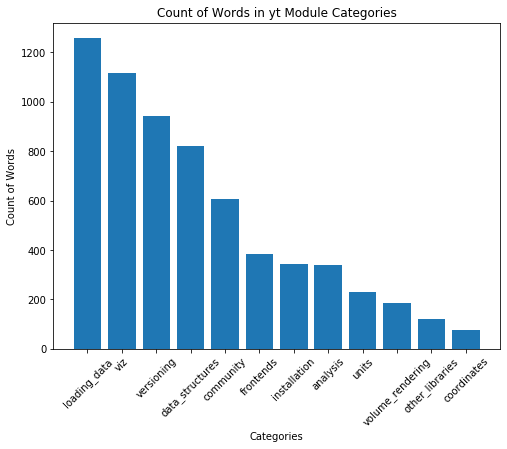

In [80]:
plt.figure(figsize=(8, 6))
plt.bar(category_sorted.keys(), category_sorted.values())
plt.xticks(rotation=45)
plt.title('Count of Words in yt Module Categories')
plt.ylabel('Count of Words')
plt.xlabel('Categories')

In [81]:
print(category_count.items())

dict_items([('versioning', 944), ('frontends', 384), ('viz', 1116), ('loading_data', 1257), ('installation', 344), ('volume_rendering', 186), ('analysis', 339), ('units', 232), ('data_structures', 820), ('community', 608), ('coordinates', 77), ('other_libraries', 122)])


In [ ]:
user_category = input("Enter a category: ")

t = cat_count_words(user_category)

plt.figure(figsize=(8, 6))

t_sorted = t.sort(key=lambda x: x[1], reverse = True)

for x in t:
    print(x)
    plt.bar(x[0], x[1])
    plt.xticks(rotation=45)

In [115]:
df_ts_id['words_per_ts'] = df_ts_id['cleaner_text'].map(lambda i: accummulate(i))
df_ts_id

type       user  \
1574339930.160000  message  UD9L1D44T   
1574344978.161000  message  U042FH0RB   
1574383719.162300  message  U046K2QNK   
1574398975.162800  message  U042FH0RB   
1574398987.163300  message  U042FH0RB   
...                    ...        ...   
1590268313.285800  message  UD9L1D44T   
1590270970.289300  message  U5ET0RNKE   
1590271291.290700  message  U5ET0RNKE   
1590271397.290800  message  U31LWTKNW   
1565779103.115100  message  UME7T58A2   

                                                                text files  \
1574339930.160000  hi ! i’m pretty sure it’s possible to define u...  None   
1574344978.161000  i don’t actually think there is a public api t...  None   
1574383719.162300  in `powderday` i'm trying to write code that w...  None   
1574398975.162800                that’ll break when yt-4.0 comes out  None   
1574398987.163300  maybe just check the first digit of the versio...  None   
...                                                              ...   ...   
1590268313.285800                                    anytime :smile:  None   
1590270970.289300  it looks like `ds.covering_grid` and `ds.smoot...  None   
1590271291.290700  is it possible to view the web documentation f...  None   
1590271397.290800  the docs from the main release versions are on...  None   
1565779103.115100                <@ume7t58a2> has joined the channel  None   

                                    timestamp        date             time  \
1574339930.160000  2019-11-21 06:38:50.160000  2019-11-21  06:38:50.160000   
1574344978.161000  2019-11-21 08:02:58.161000  2019-11-21  08:02:58.161000   
1574383719.162300  2019-11-21 18:48:39.162300  2019-11-21  18:48:39.162300   
1574398975.162800  2019-11-21 23:02:55.162800  2019-11-21  23:02:55.162800   
1574398987.163300  2019-11-21 23:03:07.163300  2019-11-21  23:03:07.163300   
...                                       ...         ...              ...   
1590268313.285800  2020-05-23 16:11:53.285800  2020-05-23  16:11:53.285800   
1590270970.289300  2020-05-23 16:56:10.289300  2020-05-23  16:56:10.289300   
1590271291.290700  2020-05-23 17:01:31.290700  2020-05-23  17:01:31.290700   
1590271397.290800  2020-05-23 17:03:17.290800  2020-05-23  17:03:17.290800   
1565779103.115100  2019-08-14 05:38:23.115100  2019-08-14  05:38:23.115100   

                   word_count  \
1574339930.160000         151   
1574344978.161000         115   
1574383719.162300         294   
1574398975.162800          35   
1574398987.163300          55   
...                       ...   
1590268313.285800          15   
1590270970.289300         579   
1590271291.290700         104   
1590271397.290800         164   
1565779103.115100          35   

                                                          clean_text  \
1574339930.160000  hi  im pretty sure its possible to define unit...   
1574344978.161000  i dont actually think there is a public api to...   
1574383719.162300  in powderday im trying to write code that will...   
1574398975.162800                   thatll break when yt40 comes out   
1574398987.163300  maybe just check the first digit of the versio...   
...                                                              ...   
1590268313.285800                                      anytime smile   
1590270970.289300  it looks like dscovering_grid and dssmoothed_c...   
1590271291.290700  is it possible to view the web documentation f...   
1590271397.290800  the docs from the main release versions are on...   
1565779103.115100                   ume7t58a2 has joined the channel   

                                                        cleaner_text  \
1574339930.160000  [pretty, possible, define, units, equivalences...   
1574344978.161000  [actually, think, public, api, poke, around, c...   
1574383719.162300  [powderday, trying, write, code, automagically...   
1574398975.162800                       [thatll, break, yt40, comes]   
1574398987.163300      [maybe, ch

In [116]:
list(df_ts_id['words_per_ts'])

[{'pretty': 1,
  'possible': 1,
  'define': 1,
  'units': 1,
  'equivalences': 1,
  'userend': 1,
  'cant': 1,
  'find': 1,
  'back': 1,
  'done': 1,
  'cookbook': 1,
  'little': 1,
  'help': 1},
 {'actually': 1,
  'think': 1,
  'public': 1,
  'api': 1,
  'poke': 1,
  'around': 1,
  'code': 1,
  'figure': 1},
 {'powderday': 1,
  'trying': 1,
  'write': 1,
  'code': 2,
  'automagically': 1,
  'check': 2,
  'yt': 1,
  'version': 1,
  'deal': 1,
  'octrees': 1,
  'accordingly': 1,
  'reasonable': 1,
  'better': 1,
  'discern': 1,
  '3x': 1,
  '4x': 1,
  'yt__version__': 1,
  '40dev0': 1,
  'blah': 1},
 {'thatll': 1, 'break': 1, 'yt40': 1, 'comes': 1},
 {'maybe': 1, 'check': 1, 'first': 1, 'digit': 1, 'version': 1, 'string': 1},
 {'yt': 1, 'internally': 1, 'version': 1, 'checks': 1},
 {'httpsgithubcomytprojectytblobmastersetuppyl311': 1},
 {'less': 1, 'than': 2, 'greater': 1, 'comparisons': 1},
 {'check': 1,
  'make': 1,
  'looseversion': 1,
  'thing': 1,
  'dev0': 1,
  'version': 1,
  'nu